# Research Question 2

How are the countries connected? Is there a pattern in the
way players in origin countries select special countries for
their offshores?

*For every combination of two countries that occur in the data
we count the number of offshores founded in one country
coming from the other country and vice versa.*

## Importing libraries

In [14]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgetsimport
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from utils import visualizer, preprocessing, visualizers_1, preprocessing_1,computations_1, visualizer_q3
import sklearn
import json
import folium
%load_ext autoreload
%autoreload 2
%matplotlib inline
#Import new style
plt.style.use('bmh')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading the data

In [15]:
entities = r'./panama_csv/Entities.csv'
entities = pd.read_csv(entities,index_col='name', header=0, low_memory=False)
entities=entities.rename(columns = {'countries':'Country'})

In [16]:
entities.head()

,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,struck_off_date,dorm_date,status,service_provider,ibcRUC,country_codes,Country,note,valid_until,node_id,sourceID
name,,,,,,,,,,,,,,,,,,,,
"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,15-FEB-2013,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,15-FEB-2014,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,15-FEB-2012,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers
"SKY-BLUE GIFTS & TOYS CO., LTD.","SKY-BLUE GIFTS & TOYS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000914.0,06-JAN-2006,16-FEB-2009,15-FEB-2009,NaN,Defaulted,Mossack Fonseca,24012,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000004,Panama Papers
FORTUNEMAKER INVESTMENTS CORPORATION,FORTUNEMAKER INVESTMENTS CORPORATION,NaN,SAM,Samoa,NaN,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,1001266.0,19-APR-2006,15-MAY-2009,15-FEB-2008,NaN,Changed agent,Mossack Fonseca,R25638,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000005,Panama Papers


The dataset contains 495038 data points, one per revealed offshore entity. In this part of the analysis we are mainly concerned with origin and goal countries of the offshore entities. The origin country can be found in the column "Country", the goal tax heaven in the column "jurisdiction_descrition". We find 519 different origin countries and 40 different goal countries.

In [17]:
len(entities)

495038

In [18]:
len(entities.Country.unique())

519

In [19]:
len(entities.jurisdiction_description.unique())

40

## Cleaning the data

A closer inspection of the data revealed that there are missing values encoded by 'Not identified', 'Undetermined', and 'Recorded in leaked files as "fund"'. We convert them to NaN. Furthermore, we observed occurences of 'United States Of America' as well as 'United States'. in order to have consistent names we rename them all to 'United States'.

In [20]:
# reencode missing values
entities.Country.replace('Not identified',np.NaN, inplace=True)
entities.jurisdiction_description.replace(['Undetermined', 'Recorded in leaked files as "fund"'],np.NaN, inplace=True)
# consistent naming
entities.jurisdiction_description.replace('United States Of America','United States', inplace=True)

## Computing the cross table of frequencies 

As mentionned above, we want to count for every combination of two countries that occur in the data the number of offshores founded in one country coming from the other country and vice versa.
The frequencies of relations can be computed using the pandas function `crosstab`.

In [21]:
crosstable = pd.crosstab(entities.Country, [entities.jurisdiction_description], rownames=['origin'], colnames=['destination'])
crosstable.tail()

destination,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,Costa Rica,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
origin,,,,,,,,,,,,,,,,,,,,,
Viet Nam,2,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Viet Nam;British Virgin Islands,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimbabwe,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A closer observation of the country names shows that some offshore entities have more than one origin country. The countries are specified in one data row and the names are seperated by ';', see for example the origin value 'Viet Nam;British Virgin Islands'. For the analysis of the relations between origin and goal countries we decided to count such relations for all of the specified origin countries.

Therefore, we refactor the crosstable by duplicating the rows with several origin countries once for every origin country. As this might result in having more than one row per origin country, in the end we group by origin country and sum up all the values. Furthermore, we again drop the row corresponding to the country value 'Not identified'.

Furthermore, in a seperate analysis we investigate which countries occur together as origin countries.

In [22]:
#duplicating the rows
multiple_orig = pd.DataFrame(columns = crosstable.reset_index().columns)
for index, row in crosstable.reset_index().iterrows():
    for orig in row['origin'].split(';'):
        multiple_orig = multiple_orig.append(pd.concat([pd.Series({'origin' : orig}), row[1:]]), ignore_index=True)
multiple_orig.head()

destination,origin,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
0,Albania,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Andorra,26,0,0,0,39,0,0,0,0,...,9,72,0,0,0,1,0,15,0,0
3,Angola,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anguilla,0,0,0,21,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#sum up values for each country
crosstable = multiple_orig.groupby('origin').sum()
crosstable = crosstable.drop('Not identified')

In [24]:
crosstable.to_csv('crosstable.csv')

For the further analysis we consider not absolute frequencies but the relative frequencies of destination countries for every origin country. Hence, we perform a row wise normailzation.

In [25]:
#row wise normalization
crosstable_norm = crosstable.div(crosstable.sum(axis=1), axis=0)

## 2.1. Relations between origin and goal countries

In order to be able to find a pattern in the
way players in origin countries select special countries for
their offshores, we cluster the origin countries into groups with similar selection data. The clustering is performed using KMeans with a k-means++ initialization and a maximum of 300 iterations. The number of clusters is determined as the number with the maximal average silhouette. We set the maximal number of clusters for the comparison to 10. It turns out that the optimal number of clusters is 4.

In [26]:
from sklearn.cluster import KMeans

def compute_clusters(crosstable_norm):
    max_n_clusters = 10
    scores = []
    clusters = []
    # try for nr of clusters up to specified max and chose clustering with optimal silhouette
    for n_clusters in range(2, max_n_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(crosstable_norm)
        clusters.append(kmeans.labels_)
        scores.append(sklearn.metrics.silhouette_score(crosstable_norm, kmeans.labels_))

    n_clusters = np.argmax(scores)
    crosstable_norm['cluster'] = clusters[n_clusters]

    return n_clusters + 2

In [27]:
n_clusters = compute_clusters(crosstable_norm)

In the following plot we visualize for each of the four resulting clusters the relative frequencies for the corresponding countries. It becomes apparent that the first cluster contains those countries where the majority of offshore entities are founded on the British Virgin Islands. The second cluster contains the countries with most offshore entities in Panama, the third those countries with a mojority of entities on the Seychelles. The countries in the fourth cluster show more diverse distributions of destination countries. We observe that for many countries in this cluster the main destination of entities is the country itself, see for example the Cook Islands or Samoa.

In [28]:
n_clusters

4

In [29]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.graph_objs import *

for i in range(n_clusters):    
    matrix = crosstable_norm[crosstable_norm.cluster == i].drop('cluster', axis=1)
    matrix[matrix == 0.0] = np.nan
    matrix_z = matrix.as_matrix()
    trace = go.Heatmap(z=matrix_z,
                      x=matrix.columns.values,
                      y=matrix.index.values,
                      colorscale = 'Reds')
    data=[trace]
    iplot(data, filename='basic-heatmap')

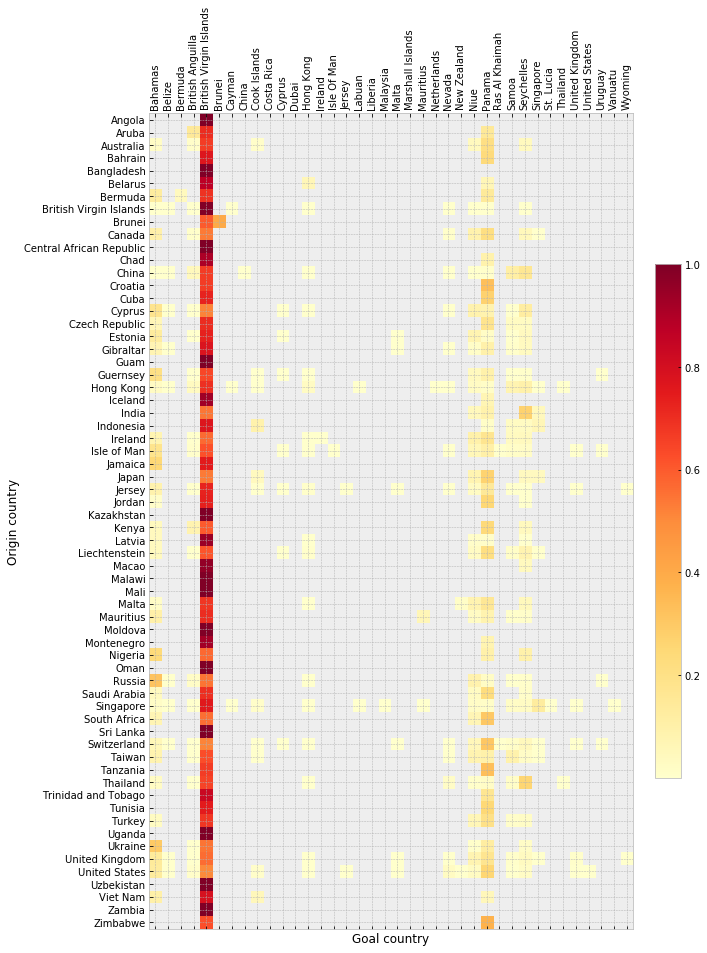

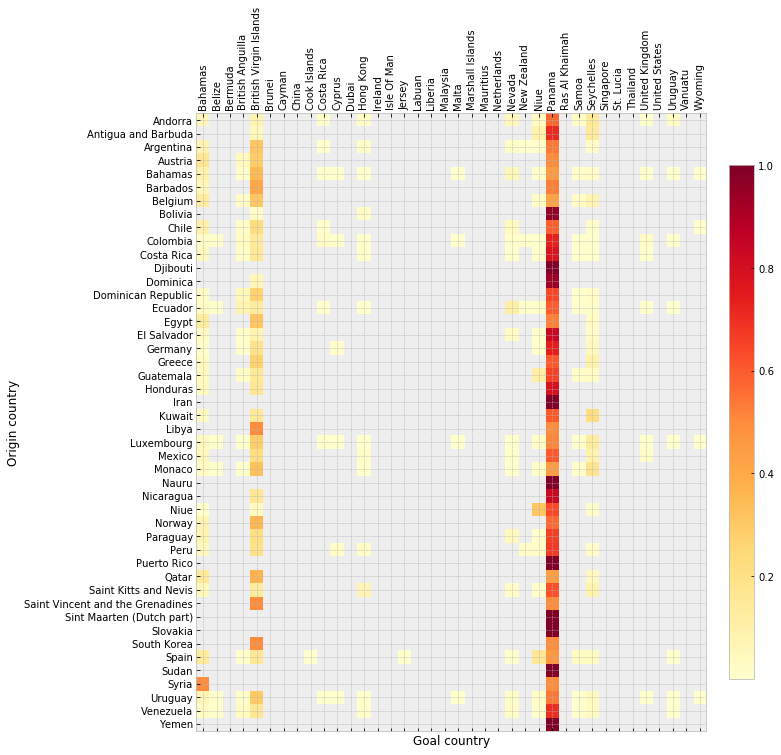

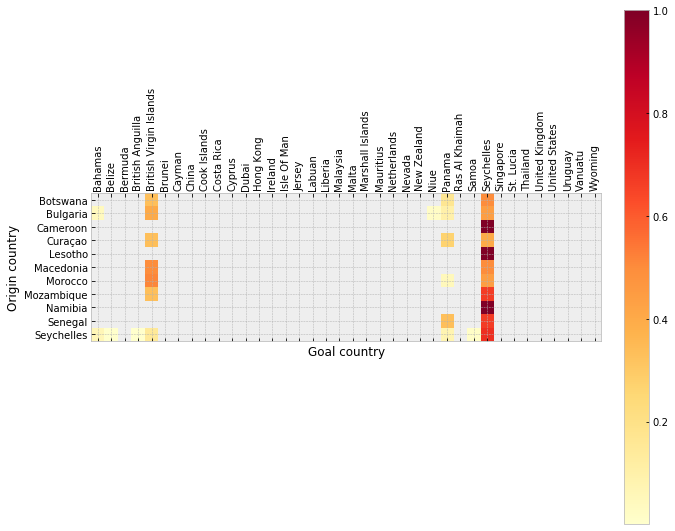

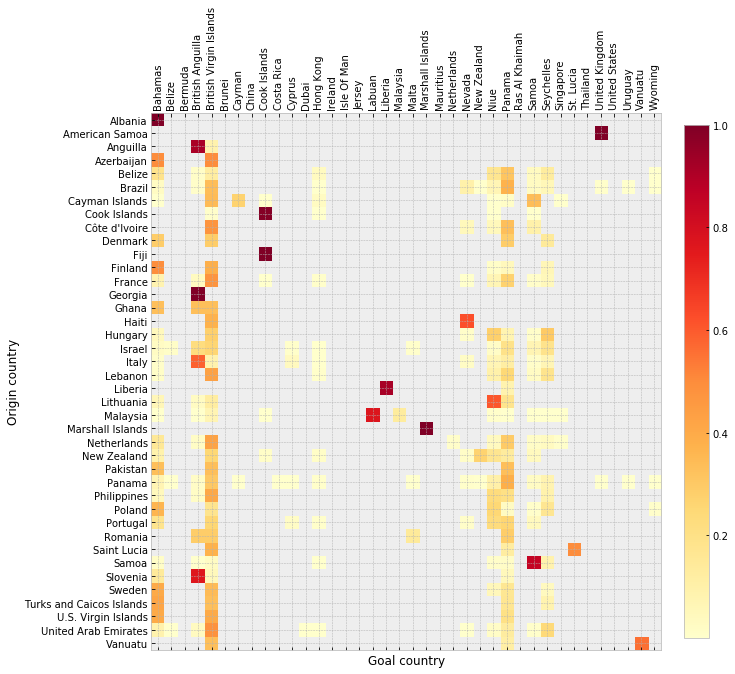

In [30]:
#plot frequencies for each cluster
for i in range(n_clusters):
    visualizer_q3.plot_cross_table(crosstable_norm[crosstable_norm.cluster == i].drop('cluster', axis=1))

In order to better understand the underlying structures that lead to those patterns of selection of destination countries, we want to find similarities of the countries which are in the same cluster. The first thing we consider is geographical closeness. Therefore we display a map where countries in the same cluster have the same color. Form the map it becomes apparent most South American countries (Brasil being the most apparent exception) have the majority of offshore entities in Panama (cluster 2). In Northern America and the UK, most offshore entities are founded on the British Virgin Islands.

In [95]:
# information that is needed for the map
cluster_info = crosstable_norm.reset_index()[['origin', 'cluster']]

In [96]:
cluster_info.head()

destination,origin,cluster
0,Albania,3
1,American Samoa,3
2,Andorra,1
3,Angola,0
4,Anguilla,3


In [97]:
# load information about countries in the world
world_topojson_path = r'json/world-countries.json'
world_topojson = json.load(open(world_topojson_path))
url = 'https://restcountries.eu/rest/v2/'
restcountries, nametoid = visualizer_q3.buildJsonAPI(url)

Republic of Kosovo has problem with numeric code None


In [98]:
# fix naming problems
nametoid['Bolivia'] = 68
nametoid['British Virgin Islands'] = 92
nametoid['Brunei'] = 96
nametoid['Iran'] = 368
nametoid['Macedonia'] = 807
nametoid['Moldova'] = 498
nametoid['Russia'] = 643
nametoid['South Korea'] = 410
nametoid['Syria'] = 760
nametoid['Tanzania'] = 834
nametoid['U.S. Virgin Islands'] = 850
nametoid['United Kingdom'] = 826
nametoid['United States'] = 840
nametoid['Venezuela'] = 862

In [99]:
#add ids to countries in order to match them with topojson data
cluster_info['id'] = cluster_info.origin.apply(lambda x: restcountries[nametoid[x]]['alpha3Code'])

In [104]:
cluster_info.head()

destination,origin,cluster,id
0,Albania,3,ALB
1,American Samoa,3,ASM
2,Andorra,1,AND
3,Angola,0,AGO
4,Anguilla,3,AIA


In [101]:
visualizer.visualize_cluster(cluster_info)

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [40]:
# create map
m = folium.Map([46.8,8], 
               tiles='cartodbpositron', 
               zoom_start=1)

In [41]:
# add the chororpleth and dispay map
visualizer_q3.addChoropleth(cluster_info, m, 'cluster','Cluster', 'id','YlGnBu', world_topojson,'objects.countries1')
m

We want to find further reasons for those patterns by considering economic background information. We investigate the economic factors by comparing the distributions of the measures specified in Index of Eonomic freedom data set between the four different clusters.

In [42]:
#merge with economic index
index_2017 = r'./the_index/index2017_data.xls'
index_2017 = pd.read_excel(index_2017,index_col = 'Country Name',header=0)

In [43]:
# Cleaning process.
index_2017 = preprocessing_1.cleaning_index_data(index_2017,'2016')
index_2017.replace('n/a', 0, inplace=True)

In [44]:
index_2017.head()

,Region,World Rank,Region Rank,Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Afghanistan,Asia-Pacific,163,40,48.885716,12.600000,28.400000,27.500000,91.5775,79.877254,97.338404,...,27.106,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8
Albania,Europe,65,30,64.353003,54.013250,28.473312,39.707367,86.8904,72.499704,51.540942,...,30.038,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
Algeria,Middle East / North Africa,172,14,46.528581,38.200000,29.631083,31.700000,81.0911,50.955175,19.847749,...,44.444,39.5,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7
Angola,Sub-Saharan Africa,165,41,48.515521,36.400000,19.800000,12.800000,87.6875,58.649804,70.743538,...,28.926,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
Argentina,Americas,156,26,50.409088,32.449712,39.580063,38.193866,62.6119,54.638703,56.411450,...,43.947,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5


In [110]:
cluster_info_totalNr = cluster_info.set_index('origin')
cluster_info_totalNr['totalNrOffshores'] = crosstable.sum(axis=1)
cluster_info_totalNr = cluster_info_totalNr.reset_index()
cluster_info_totalNr.head()

destination,origin,cluster,id,totalNrOffshores
0,Albania,3,ALB,2
1,American Samoa,3,ASM,1
2,Andorra,1,AND,489
3,Angola,0,AGO,10
4,Anguilla,3,AIA,23


In [111]:
cluster_index = pd.merge(cluster_info_totalNr, index_2017, left_on='origin', right_index=True)
cluster_index.head()

,origin,cluster,id,totalNrOffshores,Region,World Rank,Region Rank,Score,Property Rights,Judical Effectiveness,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Albania,3,ALB,2,Europe,65,30,64.353003,54.013250,28.473312,...,30.038,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
3,Angola,0,AGO,10,Sub-Saharan Africa,165,41,48.515521,36.400000,19.800000,...,28.926,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
6,Argentina,1,ARG,270,Americas,156,26,50.409088,32.449712,39.580063,...,43.947,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5
8,Australia,0,AUS,96,Asia-Pacific,5,4,81.015797,81.713325,92.942177,...,37.249,23.9,1138.1,2.5,2.7,47389.1,6.3,1.5,22264.5,36.8
9,Austria,1,AUT,24,Europe,30,17,72.265759,86.021044,81.783098,...,51.939,8.6,404.3,0.9,1.0,47249.9,5.7,0.8,3837.4,86.2


In [112]:
len(cluster_index['origin'].unique())

129

In [113]:
len(cluster_info)

161

There are 32 countries for which we cannot find info in index:

In [114]:
not_contained = cluster_info.origin[~cluster_info.origin.isin(cluster_index['origin'])].dropna()
display(not_contained)

1                        American Samoa
2                               Andorra
4                              Anguilla
5                   Antigua and Barbuda
7                                 Aruba
18                              Bermuda
22               British Virgin Islands
23                               Brunei
27                       Cayman Islands
33                         Cook Islands
37                              Curaçao
55                            Gibraltar
57                                 Guam
59                             Guernsey
69                          Isle of Man
74                               Jersey
87                                Macao
93                     Marshall Islands
97                               Monaco
102                               Nauru
107                                Niue
117                         Puerto Rico
121               Saint Kitts and Nevis
122                         Saint Lucia
123    Saint Vincent and the Grenadines


In [115]:
len(not_contained)
#Korea, South
#Vietnam
#Brunei Darussalam
#Macau
#Saint. Vincent and the Grenadines
#slovakia

32

In [116]:
cluster_index = cluster_index.drop('id', 1)

In [117]:
cluster_index.to_csv('cluster_index.csv')

In [118]:
cluster_index_grouped = cluster_index.groupby('cluster')

In [119]:
open_markets_data = ['Trade Freedom','Investment Freedom ','Financial Freedom']
regulatory_efficiency_data = ['Business Freedom','Labor Freedom','Monetary Freedom']
rule_of_law_data = ['Property Rights','Government Integrity','Judical Effectiveness']
government_size_data = ['Gov\'t Spending','Fiscal Health','Tax Burden']
economical_data = ['GDP (Billions, PPP)','GDP Growth Rate (%)','GDP per Capita (PPP)'\
                   ,'Gov\'t Expenditure % of GDP ','Inflation (%)',\
                   'FDI Inflow (Millions)','Public Debt (% of GDP)']

In [120]:
#cluster_index_grouped[open_markets_data].mean()

In [121]:
#cluster_index_grouped[regulatory_efficiency_data].mean()

In [122]:
#cluster_index_grouped[rule_of_law_data].mean()

In [123]:
#cluster_index_grouped[government_size_data].mean()

In [124]:
#cluster_index_grouped[economical_data].mean()

In [127]:
import statsmodels.api as sm
from sklearn import preprocessing

#X = preprocessing.scale(cluster_index.drop(['cluster', 'Region', 'origin'], 1))
X_df = cluster_index[['totalNrOffshores'] + economical_data]
X = preprocessing.scale(X_df)
X = pd.DataFrame(X, columns=X_df.columns, index = X_df.index)
y = cluster_index['cluster']
logit_model=sm.MNLogit(y,X)
result=logit_model.fit(method='powell', maxiter=100)#epsilon=1e-3)
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.268970
         Iterations: 7
         Function evaluations: 1917
                          MNLogit Regression Results                          
Dep. Variable:                cluster   No. Observations:                  129
Model:                        MNLogit   Df Residuals:                      105
Method:                           MLE   Df Model:                           21
Date:                Sun, 17 Dec 2017   Pseudo R-squ.:               -0.003756
Time:                        12:25:25   Log-Likelihood:                -163.70
converged:                       True   LL-Null:                       -163.08
                                        LLR p-value:                     1.000
                  cluster=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
totalNrOffshores               -0.336

In [63]:
#TODO add PCA
# remark that next section is not included in data story

## 2.2. Relations between origin countries

In this section we want to further analyze which countries occur together as origin countries. We plan to follow the same steps of analysis as in the previous section.

In [ ]:
#plot for first superficial analsis
countries = entities.Country.dropna()
counts = countries[countries.str.contains(';') & ~(countries.str.contains('Not identified'))].value_counts()
ax = counts[counts >= 10].plot(kind='barh', figsize=(10, 50))
ax.invert_yaxis()

We observe that if more than one origin country is specified, one of them is very often the British Virgin Islands. We guess this might be due to special legal requirements for founding an entity there. (TODO: verify).

In [ ]:
#split the strings into the different country names for further analysis
split = pd.DataFrame(entities.Country.dropna()[entities.Country.dropna().str.contains(';')].str.split(';').tolist(), columns = ['origin1','origin2', 'origin3', 'origin4'])#

In [ ]:
#get unique values, this will be the rows / cols of the crosstable
vals = split.values.flatten()
#vals = np.unique(vals[(vals != np.array(None)) & (vals !='Not identified')])
vals = np.unique(vals[(vals != np.array(None))])

In [ ]:
vals

In [ ]:
split

In [ ]:
split[split.values == 'Andorra']

In [ ]:
crosstable_origin = pd.DataFrame(0, columns=vals, index=vals)

In [ ]:
for index, row in split.iterrows():
    #tokens = [t for t in row if t and t != 'Not identified']
    tokens = [t for t in row if t]
    for t in tokens:
        for t2 in tokens:
            if(t!=t2):
                crosstable_origin.loc[t][t2] += 1

In [ ]:
crosstable_origin.head()

In [ ]:
crosstable_origin_norm = crosstable_origin.div(crosstable_origin.sum(axis=1), axis=0)
crosstable_origin_norm 

In [ ]:
n_clusters = compute_clusters(crosstable_origin_norm)

In [ ]:
#plot frequencies for each cluster
for i in range(n_clusters):
    visualizer_q3.plot_cross_table(crosstable_origin_norm[crosstable_origin_norm.cluster == i].drop('cluster', axis=1))

In [ ]:
#now we drop 'Not identified' as we only needed it for clustering,
#but are not interested in its relationship to other values
crosstable_origin_norm.drop(['Not identified'], inplace=True)

crosstable_origin_norm = crosstable_origin_norm.reset_index()

In [ ]:
cluster_info = crosstable_origin_norm[['index', 'cluster']]
cluster_info.columns = ['country', 'cluster']
cluster_info['id'] = cluster_info.country.apply(lambda x: restcountries[nametoid[x]]['alpha3Code'])

In [ ]:
# create map
m1 = folium.Map([46.8,8], 
               tiles='cartodbpositron', 
               zoom_start=1)

In [ ]:
# add the chororpleth and dispay map
visualizer_q3.addChoropleth(cluster_info, m1, 'cluster','Cluster', 'id','YlGnBu', world_topojson,'objects.countries1')
m1

In [ ]:
n_clusters